In [ ]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

conn = pyodbc.connect(
    "DRIVER=/opt/homebrew/lib/libmsodbcsql.18.dylib;"
    "SERVER=localhost,1433;"
    "DATABASE=CMU_DS_WP;"
    "UID=sa;"
    "PWD=YourStrong!Passw0rd;"
    "Encrypt=no;"
    "TrustServerCertificate=yes;"
)

In [8]:
# Display the first 5 rows
tables = [
    "OE_Activity",
    "OE_Locations",
    "OE_Products"
]
for t in tables:    
    query_head = "SELECT TOP 5 * FROM " + t
    df = pd.read_sql(query_head, conn)
    display(df)

/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/493709211.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_head, conn)


,ActivityCode,UserID,WorkCode,AssignmentID,ProductID,Quantity,Timestamp,LocationID
0,PickPut,419,20,7954566,4289.0,1.0,2025-11-10 11:37:14.160,826367.0
1,AssignmentOpen,64,10,7954429,NaN,NaN,2025-11-10 11:38:34.043,NaN
2,PickPut,419,20,7954541,6592.0,1.0,2025-11-10 11:39:42.330,14524.0
3,PickPut,419,20,7954542,6592.0,1.0,2025-11-10 11:39:42.883,14524.0
4,PickPut,419,20,7954543,6592.0,1.0,2025-11-10 11:39:43.483,14524.0


/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/493709211.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_head, conn)


,LocationID,Aisle,Bay,Level,Slot
0,1,10,24,01,01
1,2,40,05,04,04
2,3,40,09,01,02
3,4,42,21,06,03
4,5,42,15,04,04


/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/493709211.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_head, conn)


,ProductID,ProductCode,UnitOfMeasure,Weight,Cube,Length,Width,Height
0,1,07062B2324X,CA,35.0000,0.938,None,None,None
1,2,0204800418,BX,2.7338,0.263,None,None,None
2,3,07062B1322Q,EA,0.6500,0.027,None,None,None
3,4,07062B1324X,EA,2.4500,0.052,None,None,None
4,5,0928141125,BX,1.4000,0.054,None,None,None


In [ ]:
tables = [
    "OE_Activity",
    "OE_Locations",
    "OE_Products"
]

for t in tables:
    print("=" * 80)
    print(f"Table: {t}")
    print("=" * 80)

    # Dimensions
    dim_query = f"SELECT COUNT(*) AS n_rows FROM {t}"
    n_rows = pd.read_sql(dim_query, conn)["n_rows"].iloc[0]

    df = pd.read_sql(f"SELECT TOP 5 * FROM {t}", conn)

    print(f"Dimensions: ({n_rows} rows, {df.shape[1]} columns)\n")

    # First 5 rows
    display(df)

    # Columns and data types
    query = f"SELECT * FROM {t}"
    df = pd.read_sql(query, conn)
    schema_df = pd.DataFrame({
        "dtype": df.dtypes.astype(str),
        "n_missing": df.isna().sum(),
        "n_unique": df.nunique(dropna=True),
        "min": df.min(),
        "max": df.max(), 
        "mean": df.mean()
    })
    display(schema_df)

    print("\n")


Table: OE_Activity
Dimensions: (96132 rows, 8 columns)



/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  n_rows = pd.read_sql(dim_query, conn)["n_rows"].iloc[0]
/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT TOP 5 * FROM {t}", conn)


,ActivityCode,UserID,WorkCode,AssignmentID,ProductID,Quantity,Timestamp,LocationID
0,PickPut,419,20,7954566,4289.0,1.0,2025-11-10 11:37:14.160,826367.0
1,AssignmentOpen,64,10,7954429,NaN,NaN,2025-11-10 11:38:34.043,NaN
2,PickPut,419,20,7954541,6592.0,1.0,2025-11-10 11:39:42.330,14524.0
3,PickPut,419,20,7954542,6592.0,1.0,2025-11-10 11:39:42.883,14524.0
4,PickPut,419,20,7954543,6592.0,1.0,2025-11-10 11:39:43.483,14524.0


/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,dtype,n_missing,n_unique,min,max
ActivityCode,object,0,2,AssignmentOpen,PickPut
UserID,int64,0,40,64,504
WorkCode,object,0,3,10,30
AssignmentID,int64,0,42241,7717782,8042473
ProductID,float64,894,7691,1.0,57791.0
Quantity,float64,894,144,1.0,1143.0
Timestamp,datetime64[ns],0,95804,2025-09-08 11:42:18.630000,2025-12-02 23:15:28.677000
LocationID,float64,894,7669,1.0,8104198.0




Table: OE_Locations
Dimensions: (33519 rows, 5 columns)



/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  n_rows = pd.read_sql(dim_query, conn)["n_rows"].iloc[0]
/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT TOP 5 * FROM {t}", conn)


,LocationID,Aisle,Bay,Level,Slot
0,1,10,24,01,01
1,2,40,05,04,04
2,3,40,09,01,02
3,4,42,21,06,03
4,5,42,15,04,04


/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,dtype,n_missing,n_unique,min,max
LocationID,int64,0,33519,1,8034868
Aisle,object,0,52,01,MANUAL PCK
Bay,object,0,87,,99
Level,object,0,13,,50
Slot,object,0,37,,35




Table: OE_Products
Dimensions: (57671 rows, 8 columns)



/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  n_rows = pd.read_sql(dim_query, conn)["n_rows"].iloc[0]
/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT TOP 5 * FROM {t}", conn)


,ProductID,ProductCode,UnitOfMeasure,Weight,Cube,Length,Width,Height
0,1,07062B2324X,CA,35.0000,0.938,None,None,None
1,2,0204800418,BX,2.7338,0.263,None,None,None
2,3,07062B1322Q,EA,0.6500,0.027,None,None,None
3,4,07062B1324X,EA,2.4500,0.052,None,None,None
4,5,0928141125,BX,1.4000,0.054,None,None,None


/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/1445358790.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,dtype,n_missing,n_unique,min,max
ProductID,int64,0,57671,1,57671
ProductCode,object,0,41981,0017006126,9990LUMSPECE
UnitOfMeasure,object,0,55,BC,VL
Weight,float64,0,5572,0.0,7584.0
Cube,float64,0,4009,0.0,421.296
Length,object,57671,0,None,None
Width,object,57671,0,None,None
Height,object,57671,0,None,None


/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/3194985590.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_counts = pd.read_sql(query, conn)


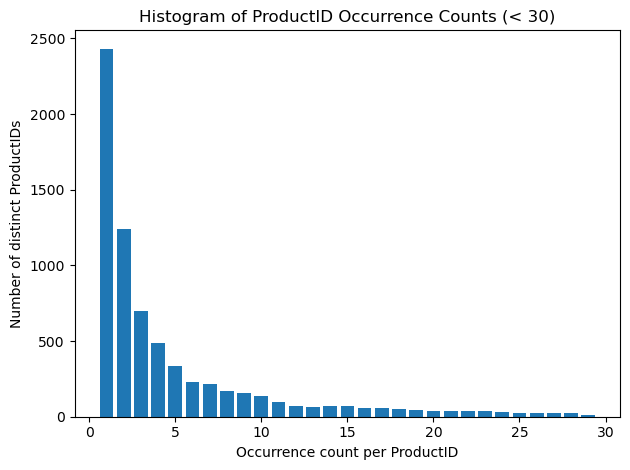

In [ ]:
query = """
SELECT ProductID, COUNT(*) AS occ_cnt
FROM OE_Activity
GROUP BY ProductID
"""
product_counts = pd.read_sql(query, conn)

# Count-of-counts for occ_cnt < 30
count_of_counts = (
    product_counts.loc[product_counts["occ_cnt"] < 30, "occ_cnt"]
    .value_counts()
    .sort_index()
)

plt.figure()
plt.bar(count_of_counts.index, count_of_counts.values)
plt.xlabel("Occurrence count per ProductID")
plt.ylabel("Number of distinct ProductIDs")
plt.title("Histogram of ProductID Occurrence Counts (< 30)")
plt.tight_layout()
plt.show()


In [ ]:
total_products = product_counts.shape[0]

pct_occ_1 = ((product_counts["occ_cnt"] == 1).sum() / total_products * 100)
pct_occ_gt_10 = ((product_counts["occ_cnt"] > 10).sum() / total_products * 100)
pct_occ_gt_50 = ((product_counts["occ_cnt"] > 50).sum() / total_products * 100)

print(f"Percentage of ProductIDs with occurrence = 1: {pct_occ_1:.2f}%")
print(f"Percentage of ProductIDs with occurrence > 10: {pct_occ_gt_10:.2f}%")
print(f"Percentage of ProductIDs with occurrence > 50: {pct_occ_gt_50:.2f}%")

Percentage of ProductIDs with occurrence = 1: 31.62%
Percentage of ProductIDs with occurrence > 10: 20.63%
Percentage of ProductIDs with occurrence > 50: 5.25%


In [ ]:
query = """
SELECT Quantity
FROM OE_Activity
WHERE Quantity IS NOT NULL
"""
qty_df = pd.read_sql(query, conn)
pct_qty_1 = (qty_df["Quantity"] == 1).mean() * 100
print(f"Percentage of rows with Quantity = 1: {pct_qty_1:.2f}%")

Percentage of rows with Quantity = 1: 38.22%


/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/2030599014.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  qty_df = pd.read_sql(query, conn)


/var/folders/hs/r4ck14j54v17d80mrc1wt5kw0000gn/T/ipykernel_21710/907350748.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  daily = pd.read_sql(query, conn)


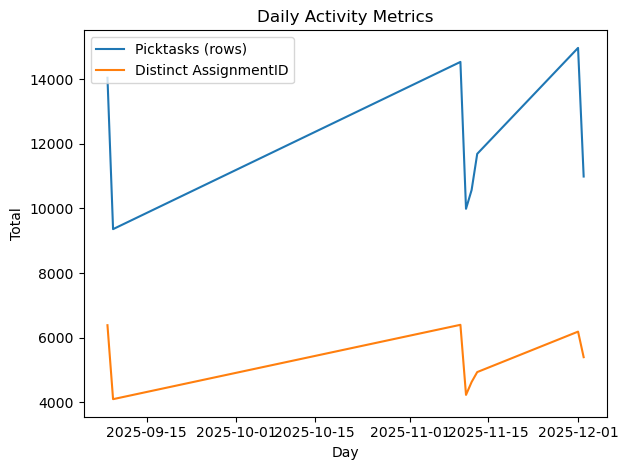

,day,picktasks,distinct_assignments,total_quantity,distinct_workers
0,2025-09-08,14043,6385,116746,29
1,2025-09-09,9358,4096,75060,33
2,2025-11-10,14533,6397,126410,31
3,2025-11-11,9988,4228,78577,32
4,2025-11-12,10569,4627,89059,30


In [34]:
query = """
SELECT
    CAST([Timestamp] AS date) AS [day],
    COUNT(*) AS picktasks,
    COUNT(DISTINCT AssignmentID) AS distinct_assignments,
    SUM(CAST(Quantity AS bigint)) AS total_quantity,
    COUNT(DISTINCT UserID) AS distinct_workers
FROM OE_Activity
WHERE [Timestamp] IS NOT NULL
GROUP BY CAST([Timestamp] AS date)
ORDER BY [day];
"""

daily = pd.read_sql(query, conn)

daily["day"] = pd.to_datetime(daily["day"])

plt.figure()
plt.plot(daily["day"], daily["picktasks"], label="Picktasks (rows)")
plt.plot(daily["day"], daily["distinct_assignments"], label="Distinct AssignmentID")

plt.xlabel("Day")
plt.ylabel("Total")
plt.title("Daily Activity Metrics")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

daily.head()
